In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import sqlite3
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [4]:
conn =sqlite3.connect('inventory.db')
df=pd.read_sql_query('select * from vendorsales',conn)
df.head()

,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,ActualPrice,Total_Quantity,Total_Dollars,Total_sales_Dollers,Total_sales_price,total_sales_Quantity,Total_Excise_Tax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,Three Olives Grape Vodka,3065,0.71,50.0,0.99,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200.0,1.99,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50.0,0.99,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50.0,0.49,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750.0,4.99,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667


In [5]:
# summer statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Total_Quantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
Total_Dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Total_sales_Dollers,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
Total_sales_price,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
total_sales_Quantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


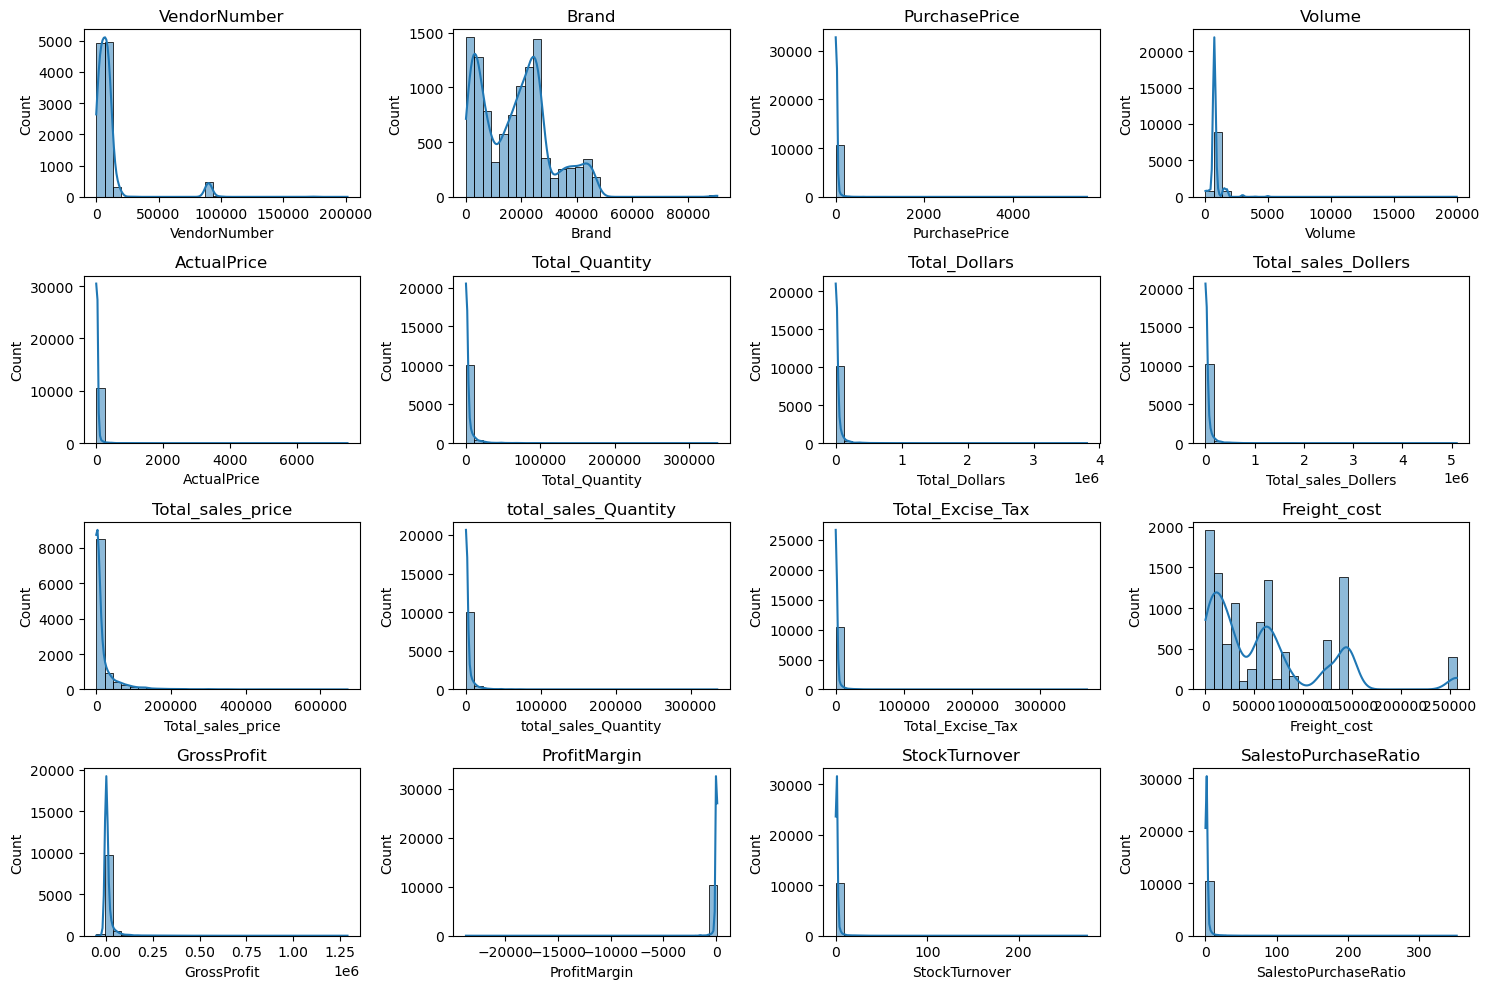

In [6]:
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col, in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

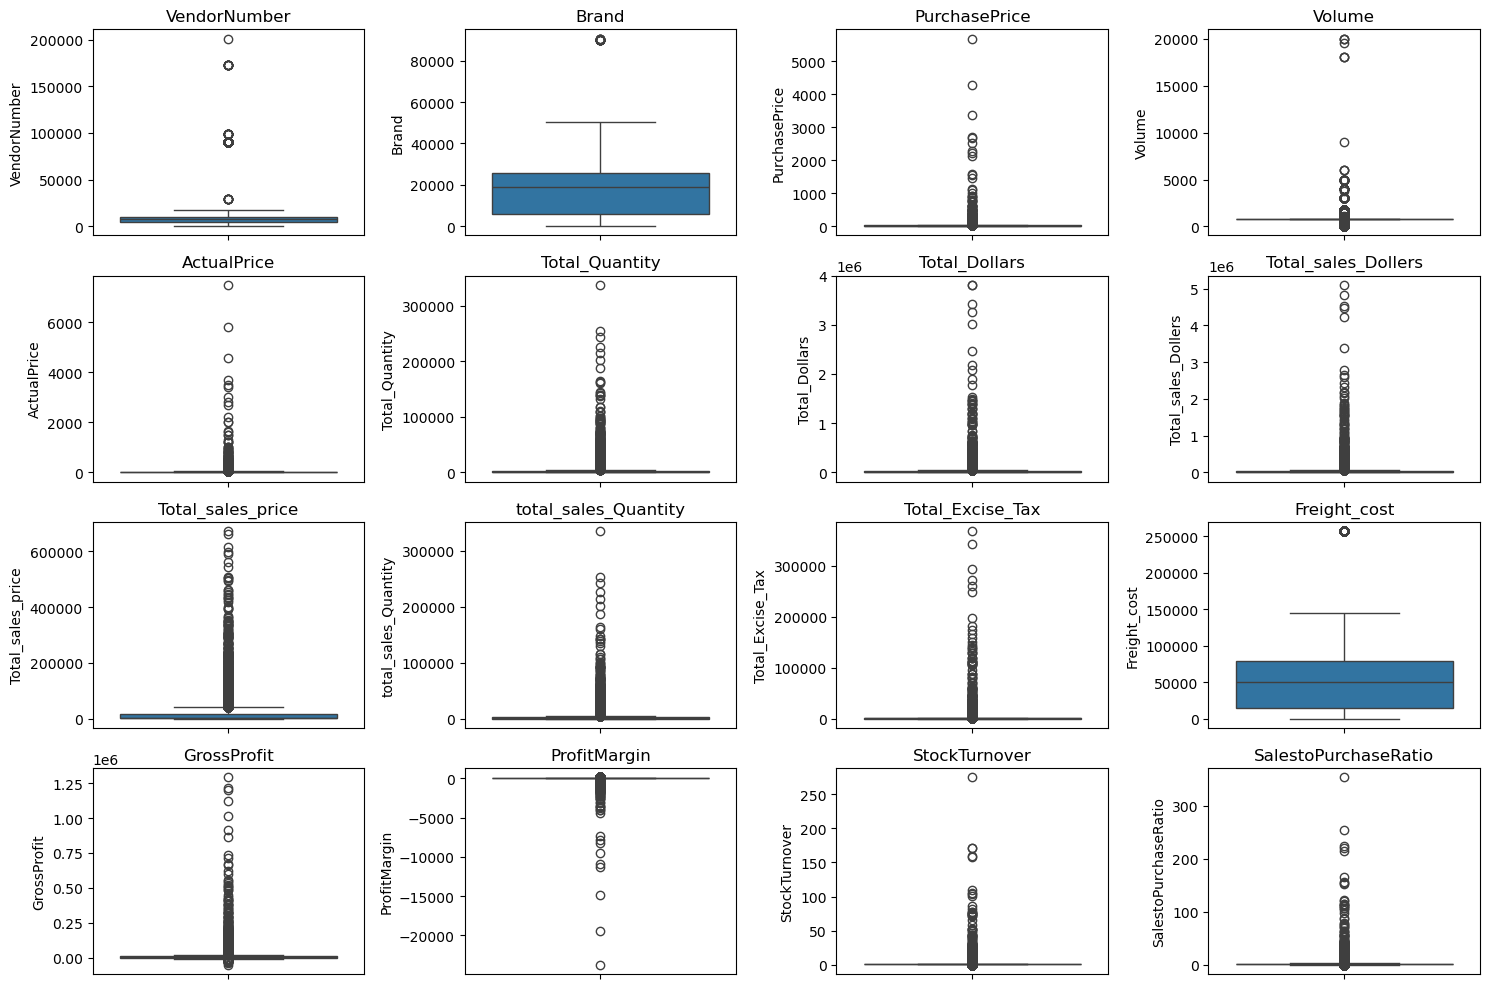

In [7]:
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col, in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [8]:
# removing inconsistency

df=pd.read_sql_query("""select *
from VendorSales
where GrossProfit >0
and ProfitMargin > 0
and total_sales_Quantity""",conn)

In [9]:
df.head()

,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,ActualPrice,Total_Quantity,Total_Dollars,Total_sales_Dollers,Total_sales_price,total_sales_Quantity,Total_Excise_Tax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,Three Olives Grape Vodka,3065,0.71,50.0,0.99,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200.0,1.99,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50.0,0.99,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50.0,0.49,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750.0,4.99,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,8564.0,10107.074965,17635.714818,2.000000,3664.000000,7153.000000,9552.000000,2.013590e+05
Brand,8564.0,17614.670131,12946.130933,58.000000,5375.750000,17606.000000,24935.250000,9.063100e+04
PurchasePrice,8564.0,21.780897,81.189624,0.360000,6.660000,10.060000,17.850000,3.352930e+03
Volume,8564.0,864.332263,724.240079,50.000000,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,8564.0,32.297467,112.420744,0.490000,9.990000,14.990000,25.990000,4.559990e+03
Total_Quantity,8564.0,3772.008991,12276.960631,1.000000,42.000000,431.000000,2666.750000,3.376600e+05
Total_Dollars,8564.0,35887.253324,136722.999153,0.710000,546.187500,5018.400000,26610.177500,3.811252e+06
Total_sales_Dollers,8564.0,51542.278077,186071.489729,1.980000,1355.580000,8483.780000,40622.112500,5.101920e+06
Total_sales_price,8564.0,22759.270732,49305.274018,0.990000,584.790000,4549.755000,22595.252500,6.728193e+05
total_sales_Quantity,8564.0,3748.983419,12125.696083,1.000000,62.000000,490.500000,2675.000000,3.349390e+05


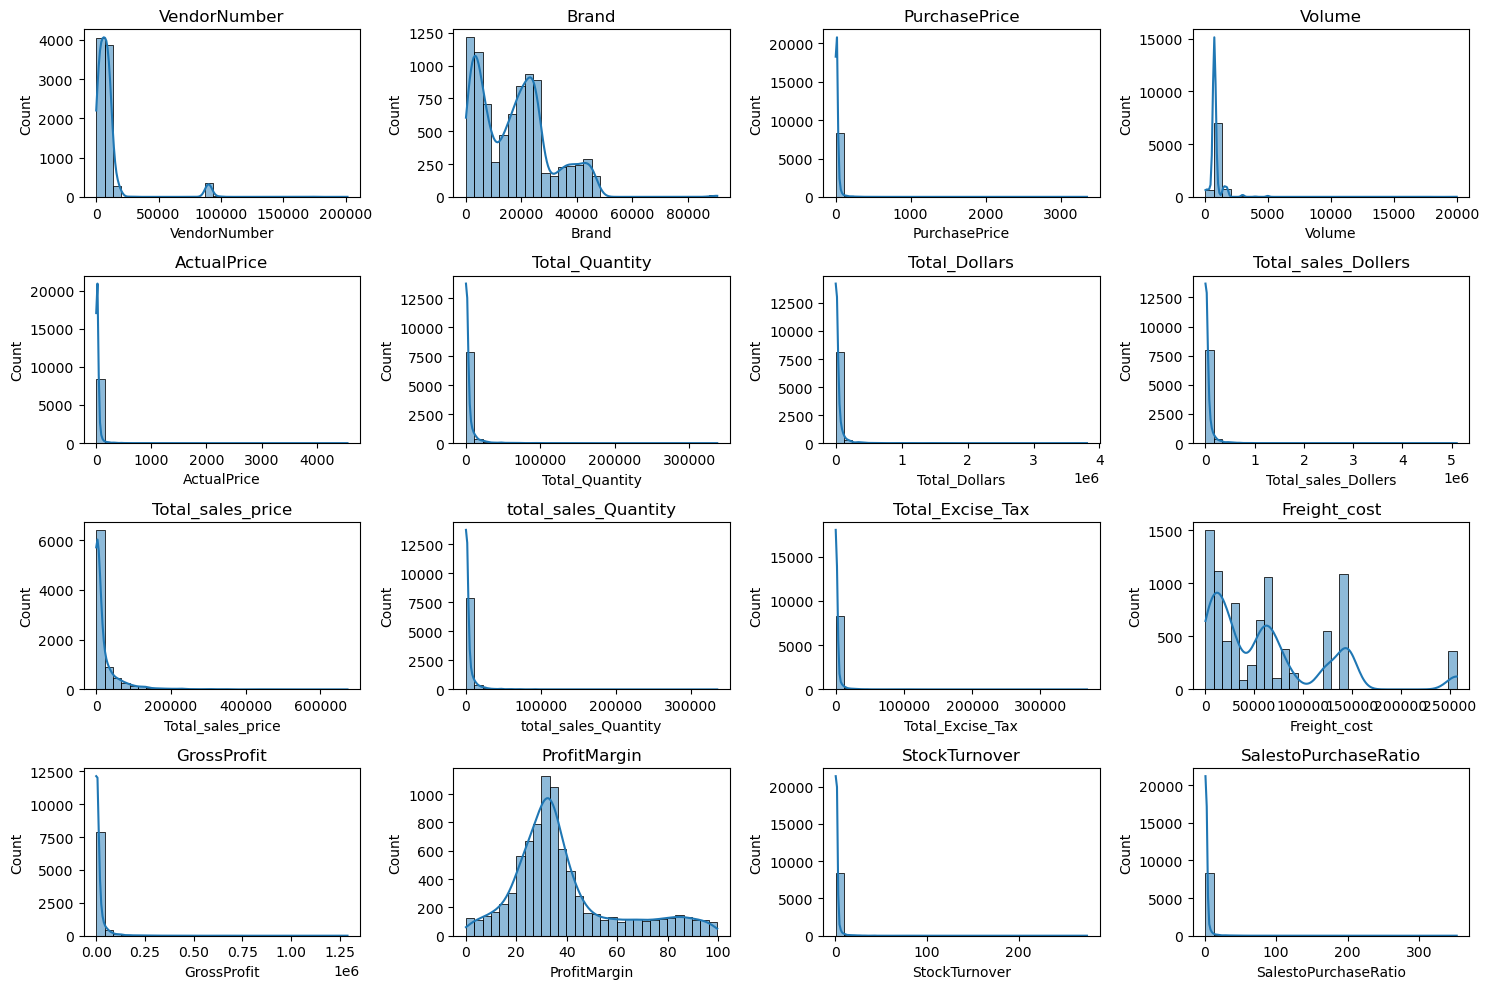

In [11]:
numerical_cols=df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col, in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

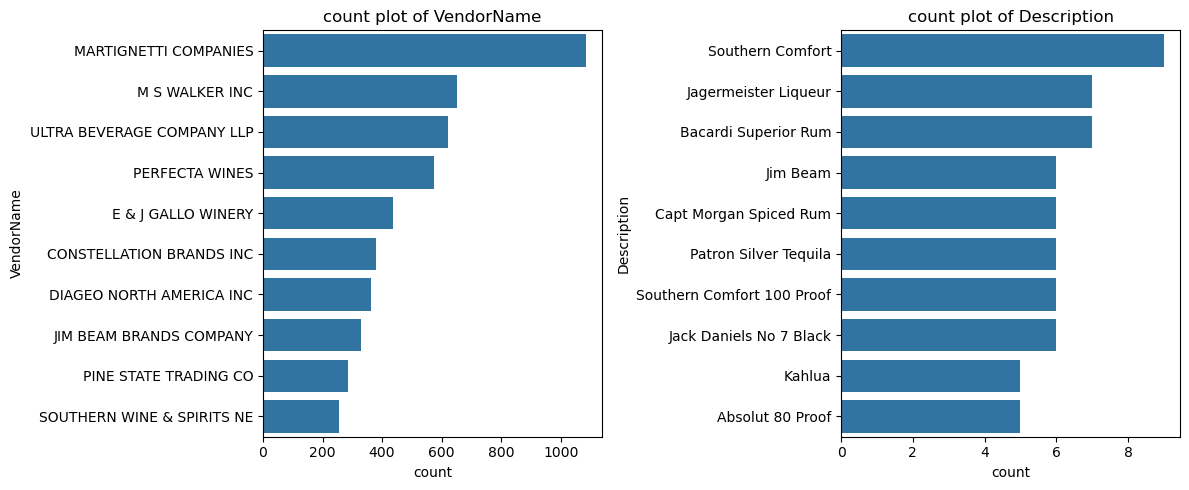

In [12]:
categorical_cols=['VendorName','Description']
plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

In [13]:

correlation_matrix=df[numerical_cols].corr()

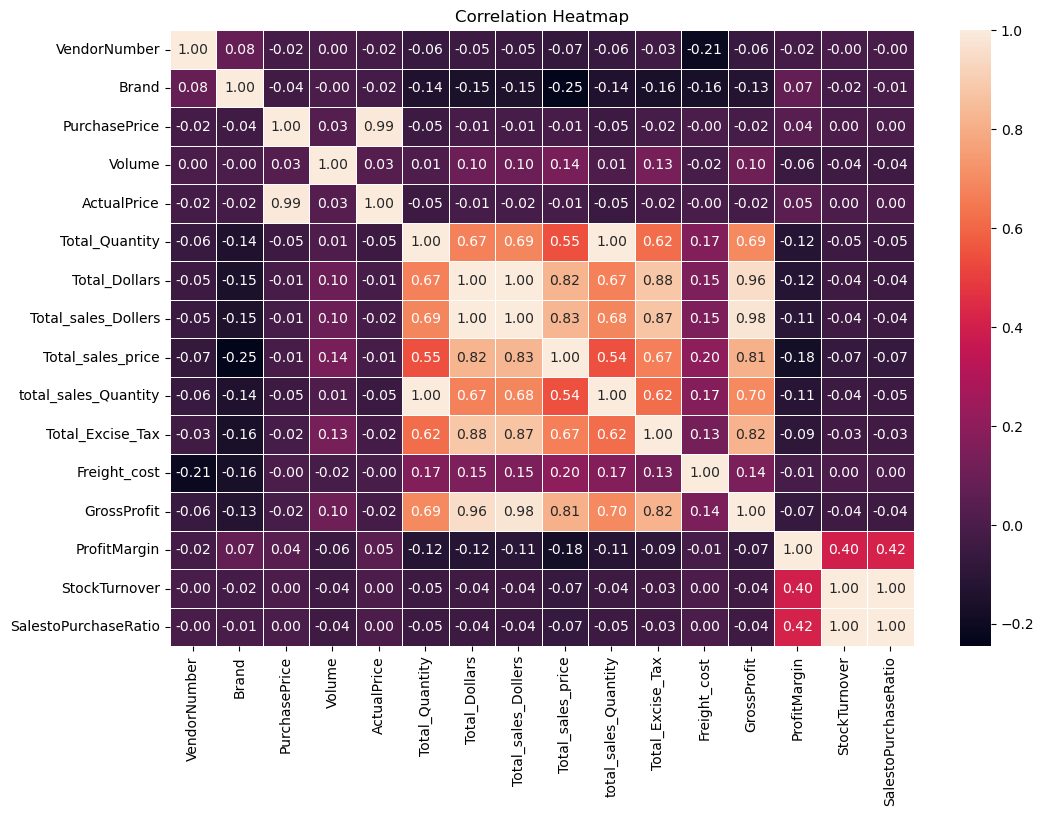

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
brand_performance=df.groupby('Description').agg({'Total_sales_Dollers':'sum','ProfitMargin':'mean'}).reset_index()

In [16]:
brand_performance

,Description,Total_sales_Dollers,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [14]:
low_sale_thesold=brand_performance['Total_sales_Dollers'].quantile(0.15)
high_margin_thresold=brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
target_brands=brand_performance[(brand_performance['Total_sales_Dollers'] <= low_sale_thesold) & (brand_performance['ProfitMargin'] >= high_margin_thresold)]

In [16]:
target_brands

,Description,Total_sales_Dollers,ProfitMargin
6,12 Days of Pearls Gift Set,309.69,97.678323
45,4 Orange Vodka,483.78,85.902683
57,A Bichot Clos Marechaudes,539.94,67.740860
59,A Bichot Merc Champs M,515.88,94.552997
96,Absolut Orient Apple Vodka,119.94,87.652159
...,...,...,...
7588,Woodford Rsv Master Coll Pnt,489.95,73.760588
7663,Zardetto Pros di Coneg Brut,345.86,88.758457
7677,Zerran Tinto Montsant,139.91,77.592738
7686,Zhenka Vodka 80 Proof,240.39,87.303964


In [17]:
brand_performance=brand_performance[brand_performance['Total_sales_Dollers']<10000]

In [18]:
brand_performance.to_csv("Brand_Performance")

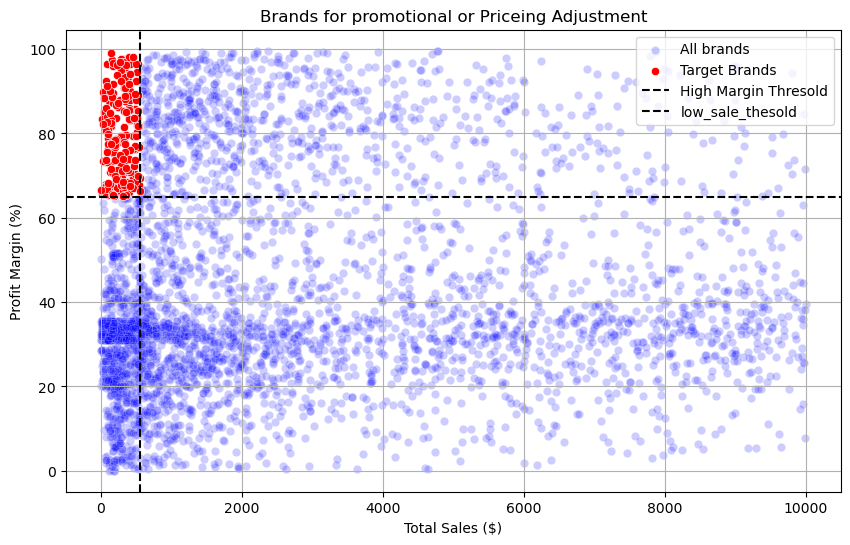

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance ,x='Total_sales_Dollers',y='ProfitMargin',color='blue',label='All brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='Total_sales_Dollers',y='ProfitMargin',color='red',label='Target Brands')

plt.axhline(high_margin_thresold,linestyle='--',color='black',label='High Margin Thresold')
plt.axvline(low_sale_thesold,linestyle='--',color='black',label='low_sale_thesold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or Priceing Adjustment")
plt.legend()
plt.grid(True)
plt.show()



In [19]:
top_vendors=df.groupby("VendorName")["Total_sales_Dollers"].sum().nlargest(10)
top_brands=df.groupby("Description")['Total_sales_Dollers'].sum().nlargest(10)

In [20]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: Total_sales_Dollers, dtype: float64

In [21]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: Total_sales_Dollers, dtype: float64

In [26]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [23]:
top_brands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: Total_sales_Dollers, dtype: object

In [24]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: Total_sales_Dollers, dtype: object

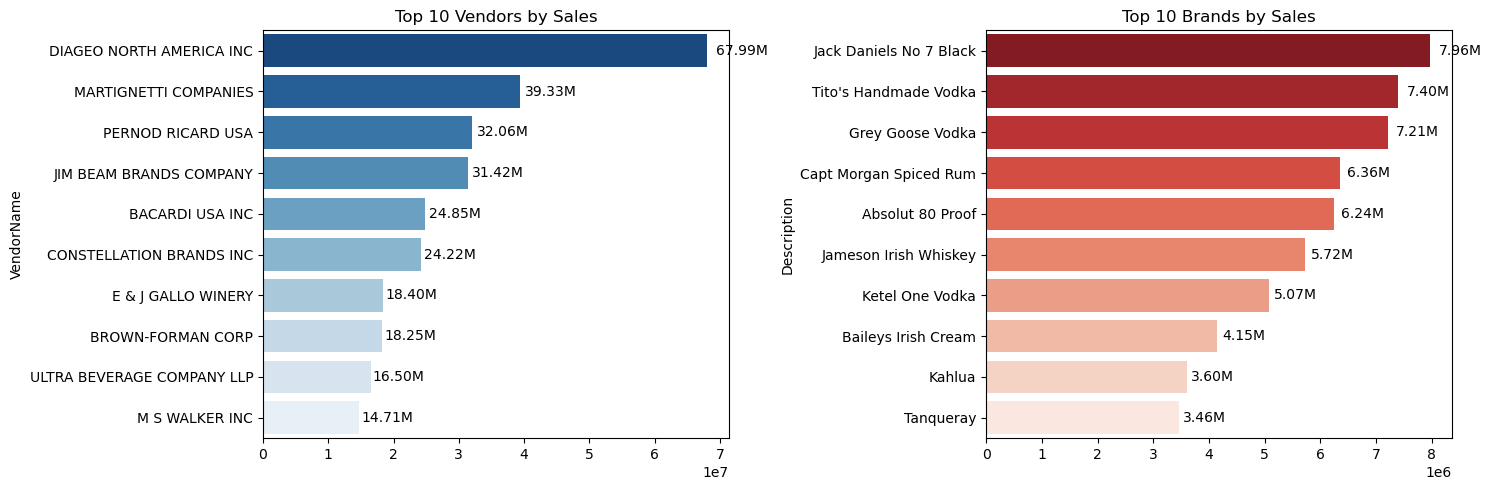

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values,palette='Blues_r')
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha='left',va='center',fontsize=10,color='black')

plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width() * 0.02),
            bar.get_y() + bar.get_height()/2,
            format_dollars(bar.get_width()),
            ha='left',va='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

In [21]:
vendor_performance=df.groupby('VendorName').agg({
    'Total_Dollars':'sum',
    'GrossProfit':'sum',
    'Total_sales_Dollers':'sum'
    
}).reset_index()

In [22]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'Brand', 'PurchasePrice',
       'Volume', 'ActualPrice', 'Total_Quantity', 'Total_Dollars',
       'Total_sales_Dollers', 'Total_sales_price', 'total_sales_Quantity',
       'Total_Excise_Tax', 'Freight_cost', 'GrossProfit', 'ProfitMargin',
       'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [27]:
vendor_performance['PurchaseContribution%']=vendor_performance['Total_Dollars']/vendor_performance['Total_Dollars'].sum()*100

In [28]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [29]:
top_vendors=vendor_performance.head(10)
top_vendors['Total_sales_Dollers']=top_vendors['Total_sales_Dollers'].apply(format_dollars)
top_vendors['Total_Dollars']=top_vendors['Total_Dollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)

In [31]:
vendor_performance.to_csv("Vendor_Performance")

In [31]:
top_vendors

,VendorName,Total_Dollars,GrossProfit,Total_sales_Dollers,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [32]:
top_vendors['PurchaseContribution%'].sum()


np.float64(65.69000000000001)

In [33]:
top_vendors['CumalativeContribution%']=top_vendors['PurchaseContribution%'].cumsum()

In [34]:
top_vendors

,VendorName,Total_Dollars,GrossProfit,Total_sales_Dollers,PurchaseContribution%,CumalativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


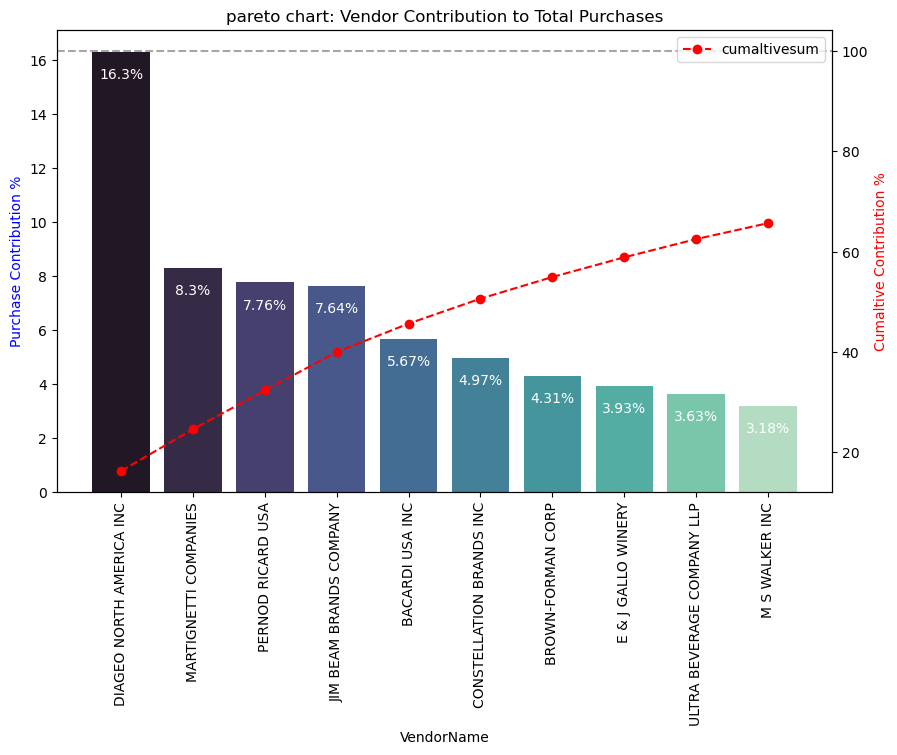

In [35]:
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette='mako',ax=ax1)
for i,value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['CumalativeContribution%'],color='red',marker='o',linestyle='dashed',label='cumaltivesum')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumaltive Contribution %',color='red')
ax2.set_title('pareto chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.show()


In [36]:
print(f"Total Purchase Contribution of top 10 Vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 Vendors is 65.69%


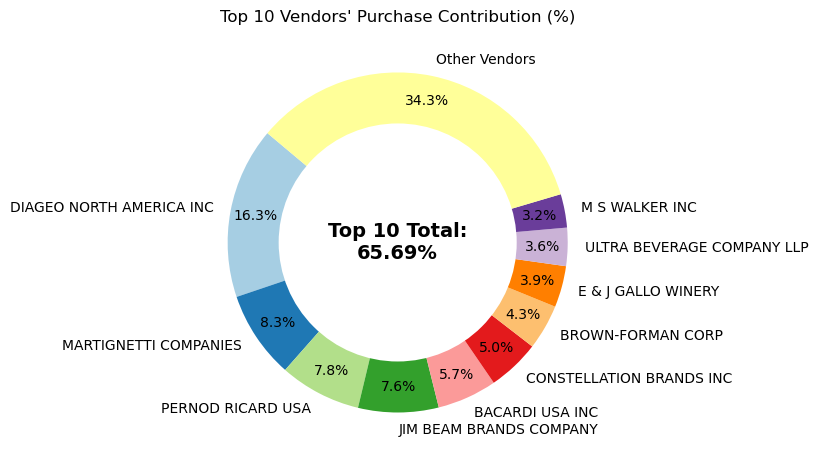

In [41]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)

# Calculate remaining contribution
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

vendors.append('Other Vendors')
purchase_contribution.append(remaining_contribution)

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Donut hole (corrected variable name)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Text inside the donut
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendors' Purchase Contribution (%)")
plt.tight_layout()
plt.show()


In [42]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'Brand', 'PurchasePrice',
       'Volume', 'ActualPrice', 'Total_Quantity', 'Total_Dollars',
       'Total_sales_Dollers', 'Total_sales_price', 'total_sales_Quantity',
       'Total_Excise_Tax', 'Freight_cost', 'GrossProfit', 'ProfitMargin',
       'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [43]:
df['UnitPurchasePrice']=df['Total_Dollars']/df['Total_Quantity']

In [44]:
df.head()

,VendorNumber,VendorName,Description,Brand,PurchasePrice,Volume,ActualPrice,Total_Quantity,Total_Dollars,Total_sales_Dollers,Total_sales_price,total_sales_Quantity,Total_Excise_Tax,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,7245,PROXIMO SPIRITS INC.,Three Olives Grape Vodka,3065,0.71,50.0,0.99,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71
1,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,6127,1.47,200.0,1.99,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47
2,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,9123,0.74,50.0,0.99,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
3,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,5683,0.39,50.0,0.49,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
4,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,8527,1.32,750.0,4.99,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32


In [46]:
df['OrderSize']=pd.qcut(df['Total_Quantity'],q=3,labels=['Small','Medium','Large'])

In [50]:
df[['OrderSize','Total_Quantity']]

,OrderSize,Total_Quantity
0,Small,1
1,Small,1
2,Small,2
3,Small,6
4,Small,2
...,...,...
8559,Large,138109
8560,Large,201682
8561,Large,187407
8562,Large,164038


In [51]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

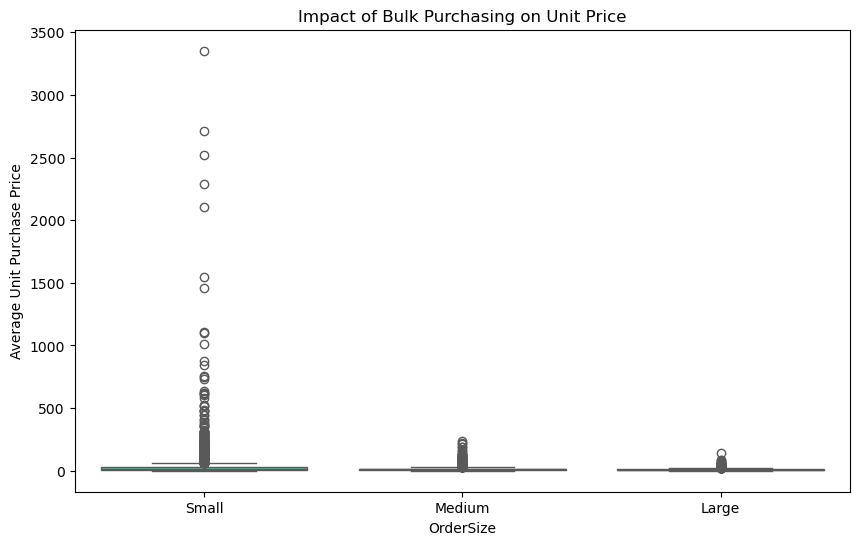

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPurchasePrice',palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel('OrderSize')
plt.ylabel('Average Unit Purchase Price')
plt.show()

In [57]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [59]:
df['UnsoldInventory']=(df['Total_Quantity']-df['total_sales_Quantity'])*df['PurchasePrice']
print('Total Unsold Capital:',format_dollars(df['UnsoldInventory'].sum()))

Total Unsold Capital: 2.71M


In [58]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'Brand', 'PurchasePrice',
       'Volume', 'ActualPrice', 'Total_Quantity', 'Total_Dollars',
       'Total_sales_Dollers', 'Total_sales_price', 'total_sales_Quantity',
       'Total_Excise_Tax', 'Freight_cost', 'GrossProfit', 'ProfitMargin',
       'StockTurnover', 'SalestoPurchaseRatio', 'UnitPurchasePrice',
       'OrderSize'],
      dtype='object')

In [60]:
inventory_value_per_vendor=df.groupby("VendorName")['UnsoldInventory'].sum().reset_index()

inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='UnsoldInventory',ascending=False)
inventory_value_per_vendor['UnsoldInventory']=inventory_value_per_vendor['UnsoldInventory'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventory
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [61]:
top_thrsold=df['Total_sales_Dollers'].quantile(0.75)
low_thresold=df['Total_sales_Dollers'].quantile(0.25)

In [62]:
top_vendors=df[df['Total_sales_Dollers']>=top_thrsold]['ProfitMargin'].dropna()
low_vendors=df[df['Total_sales_Dollers']<=low_thresold]['ProfitMargin'].dropna()

In [63]:
top_vendors

3513    94.271857
3643    95.012530
3812    93.085860
4882    85.782102
5040    79.684817
          ...    
8559    28.412764
8560    27.139908
8561    24.675786
8562    21.062810
8563    25.297693
Name: ProfitMargin, Length: 2141, dtype: float64

In [64]:
low_vendors

0       99.166079
1       98.974037
2       25.252525
3       96.436186
4       83.448276
          ...    
2839     7.239599
2859     1.677308
2862    12.007271
2911     6.145626
2932     4.111764
Name: ProfitMargin, Length: 2141, dtype: float64

In [68]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data))
    t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val + margin_of_error

Top Vendors 95% CI: (31.177912,30.742064,31.613761)
Top Vendors 95% CI: (41.569170,40.501413,42.636927)


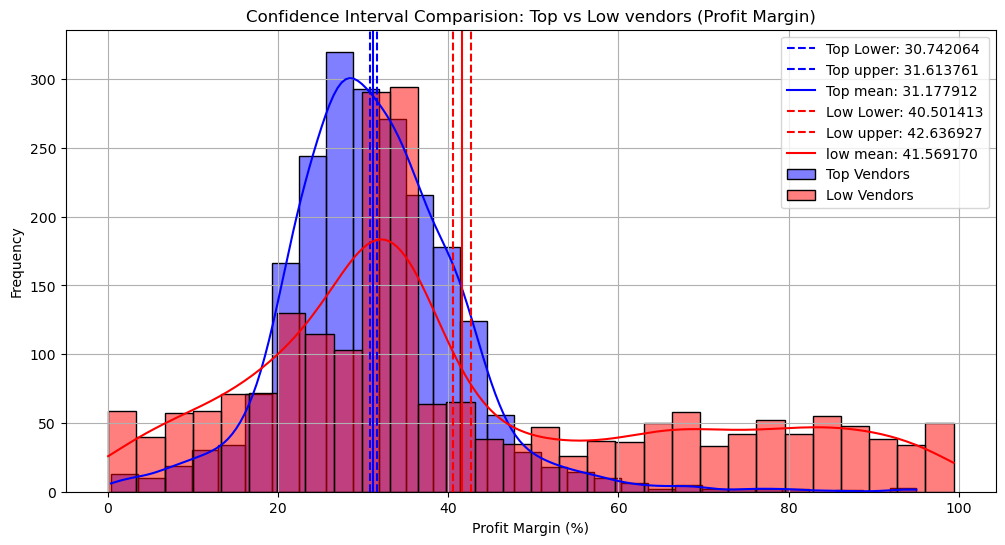

In [69]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors)
low_mean,low_lower,low_upper=confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_mean:2f},{top_lower:2f},{top_upper:2f})")
print(f"Top Vendors 95% CI: ({low_mean:2f},{low_lower:2f},{low_upper:2f})")

plt.figure(figsize=(12,6))

sns.histplot(top_vendors,kde=True,color="blue",bins=30,alpha=0.5,label='Top Vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f"Top Lower: {top_lower:2f}")
plt.axvline(top_upper,color='blue',linestyle='--',label=f"Top upper: {top_upper:2f}")
plt.axvline(top_mean,color='blue',linestyle='-',label=f"Top mean: {top_mean:2f}")

sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label='Low Vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f"Low Lower: {low_lower:2f}")
plt.axvline(low_upper,color='red',linestyle='--',label=f"Low upper: {low_upper:2f}")
plt.axvline(low_mean,color='red',linestyle='-',label=f"low mean: {low_mean:2f}")


plt.title("Confidence Interval Comparision: Top vs Low vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
top_thrsold=df['Total_sales_Dollers'].quantile(0.75)
low_thresold=df['Total_sales_Dollers'].quantile(0.25)

top_vendors=df[df['Total_sales_Dollers']>=top_thrsold]['ProfitMargin'].dropna()
low_vendors=df[df['Total_sales_Dollers']<=low_thresold]['ProfitMargin'].dropna()

t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

print(f"T-Statistics: {t_stat:4f},P_Value: {p_value:4f}")

if p_value <0.05:
    print("Reject H0: There is a significant difference in profit margin between top and low-performing vendors.")

else:
    print("Fail to reject H0: No significant difference in profit margin.")


T-Statistics: -17.669523,P_Value: 0.000000
Reject H0: There is a significant difference in profit margin between top and low-performing vendors.


In [72]:
df.to_csv("VendorSalesSummery")